In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
import seaborn as sn

In [209]:
train=pd.read_csv('D:\\DataScience\\LoanPrediction\\train_u6lujuX_CVtuZ9i.csv')
test=pd.read_csv('D:\\DataScience\\LoanPrediction\\test_Y3wMUE5_7gLdaTN.csv')

In [302]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), object(8)
memory usage: 62.4+ KB


In [211]:
train[train.Gender.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [212]:
train['Gender']=train.groupby(['Education','Property_Area'])['Gender'].transform(lambda x:x.fillna(x.mode()[0]))

In [213]:
train.iloc[104]

Loan_ID              LP001357
Gender                   Male
Married                   NaN
Dependents                NaN
Education            Graduate
Self_Employed              No
ApplicantIncome          3816
CoapplicantIncome         754
LoanAmount                160
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
Loan_Status                 Y
Name: 104, dtype: object

In [214]:
train[train.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [215]:
condition=(train['ApplicantIncome']>0)&(train['CoapplicantIncome'] >0 ) 

In [216]:
condition2=(train['Married'].isnull())

In [217]:
criteria = condition & condition2

In [218]:
train.loc[criteria,'Married']='Yes'

In [219]:
train['Married'].fillna('No',inplace=True)

In [220]:
train[train.Dependents.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,No,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [224]:
train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [222]:
train['Dependents']=train.groupby(['Gender','Married','Education','Property_Area'])['Dependents'].transform(lambda x:x.fillna(x.mode()[0]))

In [225]:
train['Self_Employed']=train.groupby(['Gender','Married','Education','Property_Area' ])['Self_Employed'].transform(lambda x:x.fillna(x.mode()[0]))

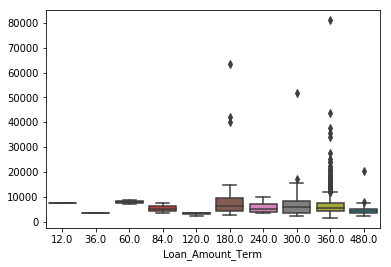

In [231]:
sn.boxplot(train['Loan_Amount_Term'],(train['ApplicantIncome']+train['CoapplicantIncome']))

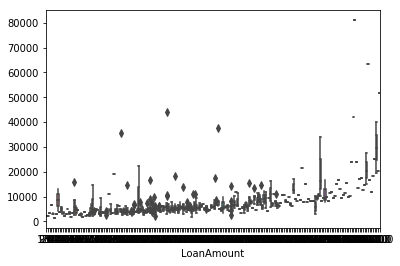

In [235]:
sn.boxplot(train['LoanAmount'],(train['ApplicantIncome']+train['CoapplicantIncome']))

In [254]:
train.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002953,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,399,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


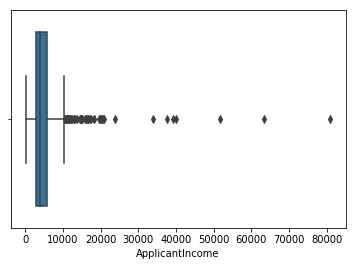

In [257]:
sn.boxplot(train['ApplicantIncome'])

In [259]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [265]:
train['ApplicantIncome'] = train['ApplicantIncome'].astype(float)

In [301]:
stds = 2.0 

train['ApplicantIncome']=   train.groupby(['Gender', 'Education', 'Self_Employed'])['ApplicantIncome'].apply(lambda x: x.fillna(x.mean()))
 

{('Female',
  'Graduate',
  'No'): Int64Index([ 17,  29,  37,  45,  48,  49,  51,  52,  64,  69,  80,  82,  96,
             111, 116, 119, 121, 122, 125, 136, 145, 146, 148, 166, 184, 198,
             206, 210, 219, 233, 238, 251, 255, 262, 263, 268, 269, 270, 283,
             288, 293, 297, 298, 302, 306, 307, 310, 312, 318, 323, 328, 329,
             339, 341, 354, 355, 360, 374, 382, 396, 399, 405, 415, 416, 435,
             495, 500, 501, 509, 516, 540, 541, 542, 548, 556, 559, 568, 582,
             600, 604, 609],
            dtype='int64'),
 ('Female',
  'Graduate',
  'Yes'): Int64Index([54, 113, 237, 286, 353, 370, 404, 430, 473, 561, 613], dtype='int64'),
 ('Female',
  'Not Graduate',
  'No'): Int64Index([50, 197, 205, 279, 338, 403, 407, 414, 421, 426, 463, 468, 480,
             519, 544, 587],
            dtype='int64'),
 ('Female',
  'Not Graduate',
  'Yes'): Int64Index([410, 439, 493, 534], dtype='int64'),
 ('Male',
  'Graduate',
  'No'): Int64Index([  0,   1,   4,  

In [270]:
score = lambda x: (x - x.mean()) / x.std()*10

In [292]:
import pandas as pd
import numpy as np

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

grouped = df.groupby('Team')


In [293]:
score = lambda x: (x - x.mean()) / x.std()*10
print grouped.transform(score)

SyntaxError: invalid syntax (<ipython-input-293-5b8f1ee590d4>, line 2)

In [294]:
grouped.

{'Devils': Int64Index([2, 3], dtype='int64'),
 'Kings': Int64Index([4, 6, 7], dtype='int64'),
 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'),
 'Royals': Int64Index([9, 10], dtype='int64'),
 'kings': Int64Index([5], dtype='int64')}